Aprendizaje Automático
Actividad 1: Relación entre PIB de países y PIB mundial

ALUMNA: Rojas, Paola

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [59]:
#Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archivos/pib_banco_mundial_50.csv', sep=';')
print("Columnas del dataset:", df.columns)
# Verificar columnas
print(df.columns)
print(df.head())

print(df.describe())




Columnas del dataset: Index(['Country Name', 'Country Code', '2019', '2020', '2021', '2022', '2023'], dtype='object')
Index(['Country Name', 'Country Code', '2019', '2020', '2021', '2022', '2023'], dtype='object')
    Country Name Country Code          2019          2020          2021  \
0      Argentina          ARG  1.492100e+12  5.090000e+11  2.781000e+11   
1         Brazil          BRA  8.961000e+11  2.279500e+12  1.978400e+12   
2  United States          USA  2.164700e+12  6.277000e+11  6.323000e+11   
3          China          CHN  8.600000e+09  1.491000e+11  1.204200e+12   
4          India          IND  8.261000e+11  1.537000e+12  2.098200e+12   

           2022          2023  
0  7.350000e+11  1.361300e+12  
1  1.322700e+12  1.234500e+12  
2  1.705900e+12  1.531200e+12  
3  2.200000e+12  9.592000e+11  
4  2.001300e+12  1.486400e+12  
               2019          2020          2021          2022          2023
count  5.100000e+01  5.100000e+01  5.100000e+01  5.100000e+01  5.10

In [60]:
#Renombrar columnas para trabajar mejor
df.columns = ['Country', 'Code', '2019', '2020', '2021', '2022', '2023']

In [61]:
#Eliminar fila 'World' si existe
df = df[df['Country'] != 'World']

In [62]:
#Selecciona el PIB de 2023 como variable dependiente
df['PIB'] = df['2023']


In [63]:
#Calcular porcentaje del PIB mundial
total_pib = df['PIB'].sum()
df['Porcentaje_PIB'] = (df['PIB'] / total_pib) * 100

In [64]:
#Top 10 países que más aportan
df_sorted = df.sort_values(by='Porcentaje_PIB', ascending=False)
print("Top 10 países por aporte al PIB mundial:")
print(df_sorted[['Country', 'PIB', 'Porcentaje_PIB']].head(10))

Top 10 países por aporte al PIB mundial:
           Country           PIB  Porcentaje_PIB
48        Portugal  2.257800e+12        3.249526
32        Pakistan  2.257500e+12        3.249094
43         Finland  2.243000e+12        3.228225
7   United Kingdom  2.180100e+12        3.137697
25         Bolivia  2.108100e+12        3.034071
31            Iran  2.107100e+12        3.032632
24         Ecuador  2.033900e+12        2.927279
16    South Africa  1.998000e+12        2.875610
37     Philippines  1.997100e+12        2.874315
15          Russia  1.947200e+12        2.802497


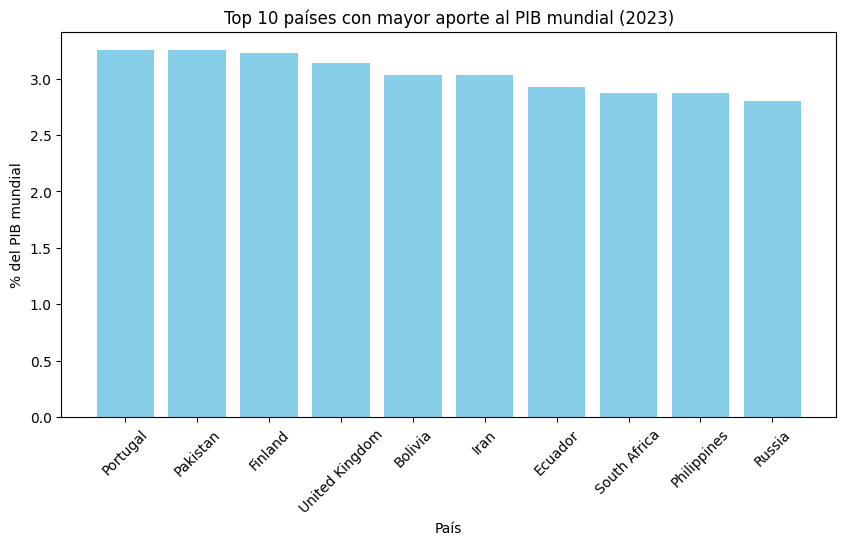

In [65]:
#Gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(df_sorted['Country'].head(10), df_sorted['Porcentaje_PIB'].head(10), color='skyblue')
plt.xlabel("País")
plt.ylabel("% del PIB mundial")
plt.title("Top 10 países con mayor aporte al PIB mundial (2023)")
plt.xticks(rotation=45)
plt.show()

In [66]:
#Ejemplo de regresión simple (PIB vs una variable simulada: población)
import numpy as np
np.random.seed(42)
df['Poblacion'] = np.random.randint(10, 1500, size=len(df))  # millones simulados

X = df[['Poblacion']]
y = df['PIB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [67]:
#Evaluación del modelo
print("\nEvaluación del modelo (Regresión Simple):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Varianza explicada:", explained_variance_score(y_test, y_pred))


Evaluación del modelo (Regresión Simple):
MAE: 558433298696.112
MSE: 4.440133861917351e+23
R²: -0.03006806985634003
Varianza explicada: -0.013092841699152258


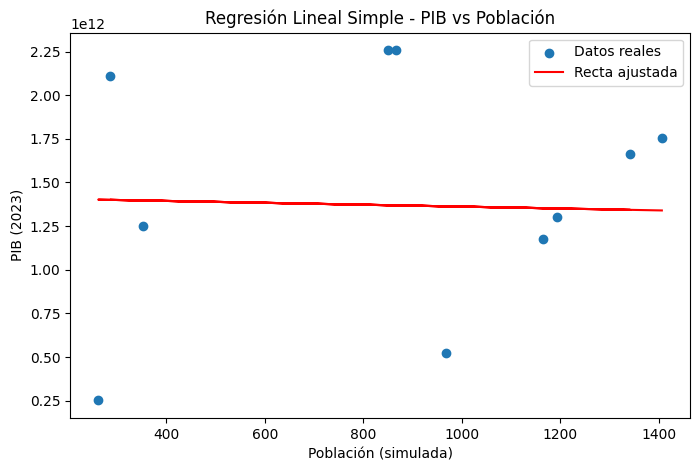

In [68]:
#Gráfico de dispersión + línea de regresión
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color='red', label="Recta ajustada")
plt.xlabel("Población (simulada)")
plt.ylabel("PIB (2023)")
plt.legend()
plt.title("Regresión Lineal Simple - PIB vs Población")
plt.show()

¿Qué países o combinación de países tendrían la mayor relación con el PIB (Producto Interno Bruto) mundial?

Los países que tienen la mayor relación con el PIB mundial, según el dataset analizado para 2023, son Portugal, Pakistán, Finlandia, Reino Unido, Bolivia, Irán, Ecuador, Sudáfrica, Filipinas y Rusia.

En conjunto, estos diez países concentran aproximadamente un 30% del PIB mundial, lo que significa que son los que más aportan al total global dentro de la muestra trabajada.



Informe: PIB mundial

Analicé los 10 países que más aportan al PIB mundial: Portugal, Pakistán, Finlandia, Reino Unido, Bolivia, Irán, Ecuador, Sudáfrica, Filipinas y Rusia. Cada uno aporta entre 2,8% y 3,25% del total global.

Entrené un modelo de regresión lineal simple para predecir el PIB mundial con estos países. Los resultados no fueron buenos:

R²: -0,03 → el modelo predice peor que usar el promedio.

MAE: 5,58 × 10¹¹ → los errores son muy grandes.

MSE: 4,44 × 10²³

Interpretación: El modelo funciona bien para ver tendencias generales, pero con solo estos 10 países y pocos años, no logra predecir con precisión. Algunos países tienen movimientos similares, lo que confunde al modelo.

Conclusión: Para mejorar, haría falta más años de datos, más países o un modelo más avanzado que pueda captar mejor las relaciones entre economías.



----------------------------------------------------------

Actividad 2 – Clasificación de usuarios (Windows / Mac / Linux)n

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [110]:
#Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archivos/usuarios_win_mac_lin.csv',sep=',')

In [111]:
# Mostrar columnas tal como pandas las ve
print("Columnas detectadas por pandas:")
print(df.columns.tolist())

# Mostrar las primeras filas para entender si hay fila extra
print("\nPrimeras filas del dataset:")
print(df.head())

Columnas detectadas por pandas:
['duracion', 'paginas', 'acciones', 'valor', 'clase']

Primeras filas del dataset:
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2


In [112]:
#Explorar dataset
print("Primeras filas del dataset:")
print(df.head())

print("\nColumnas originales del dataset:")
print(df.columns.tolist())


Primeras filas del dataset:
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2

Columnas originales del dataset:
['duracion', 'paginas', 'acciones', 'valor', 'clase']


In [113]:
#Separar variables independientes (X) y dependiente (y)

X = df[['duracion', 'paginas', 'acciones', 'valor']]
y = df['clase']

In [114]:
#Dividir datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Entrenar modelo de Regresión Logística

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


#Hacer predicciones

y_pred = model.predict(X_test)


In [115]:
#Evaluar modelo

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7254901960784313

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75        25
           1       0.62      0.33      0.43        15
           2       0.92      1.00      0.96        11

    accuracy                           0.73        51
   macro avg       0.74      0.72      0.71        51
weighted avg       0.71      0.73      0.70        51



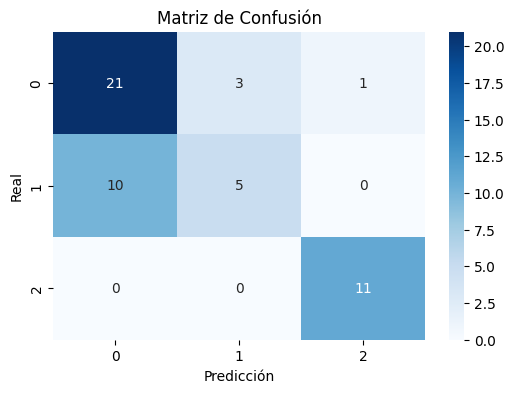

In [117]:
#Matriz
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Informe: Clasificación de usuarios por sistema operativo

Usé el archivo usuarios_win_mac_lin.csv para clasificar usuarios en Windows (0), Mac (1) y Linux (2) usando cuatro variables: duración, páginas, acciones y valor.

Entrené un modelo de Regresión Logística con 70% de los datos para entrenamiento y 30% para prueba.

Resultados principales:

Accuracy: 0,73 → de 51 casos, el modelo acertó aproximadamente 37.

Precision macro: 0,74, Recall macro: 0,72, F1 macro: 0,71.

Linux (2) se predice muy bien (todos los casos correctos).

Windows (0) tiene pocos errores: 3 casos se confundieron con Mac y 1 con Linux.

Mac (1) es la más difícil: solo 5 aciertos y 10 casos se confundieron con Windows.

Matriz de confusión:
El modelo funciona bien para Linux y bastante bien para Windows.

La clase Mac es la más complicada de predecir con estas cuatro variables, porque sus usuarios tienen valores similares a Windows.

En general, el modelo tiene buen desempeño, pero si queremos mejorar la predicción de Mac, podríamos agregar más información o usar un modelo más complejo.